## Refrences link

- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [50]:
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

/home/tenzin/ML/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Random Sampling

In [149]:
PATH = '../data/currency/train_dir/'
cls = 'fifty/'
data_range = np.arange(81, 403)
def load_random_sample():
    X_train, Y_train = [], []
    samples = np.random.choice(data_range, 4)
    for sample in samples:
        img = Image.open(PATH+cls+str(sample)+'.jpg').resize((299, 299)) # size of InceptionV3 model
        X_train.append(np.asarray(img))
        Y_train.append(0)
    return np.stack(X_train, axis=0), np.array(X_train)

X_train, Y_train = load_random_sample()
X_train.shape

(4, 299, 299, 3)

## Helper Functions

## Original images

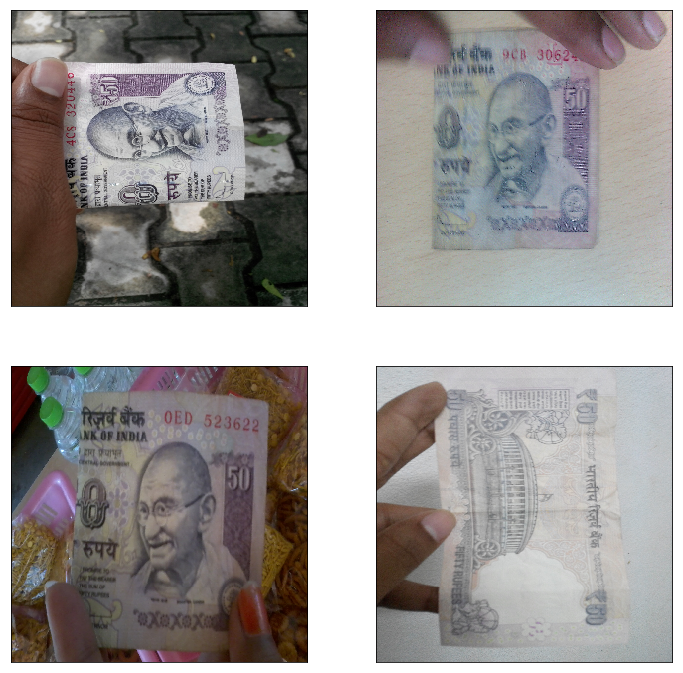

In [150]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Feature Standardization

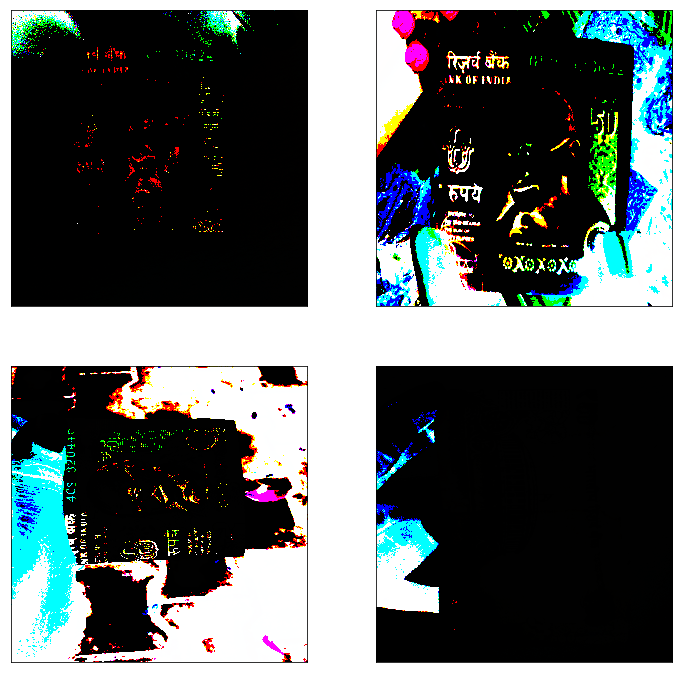

In [151]:
# Convert from int to float
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')

# define data preparation
datagen_fs = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameter from data
datagen_fs.fit(X_train)

# Configure batch szie and retrieve one batch of images
for X_batch, Y_batch in datagen_fs.flow(X_train, Y_train, batch_size=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

## ZCA Whitening

In [116]:
datagen_zca = ImageDataGenerator(zca_whitening=True)
datagen_zca.fit(X_train)

for X_batch, _ in datagen_zca.flow(X_train, Y_train, batch_size=1):
    fig, axes = plt.subplots(1, 1, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

/home/tenzin/ML/env/lib/python3.5/site-packages/keras/preprocessing/image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


MemoryError: 

## Random Rotations

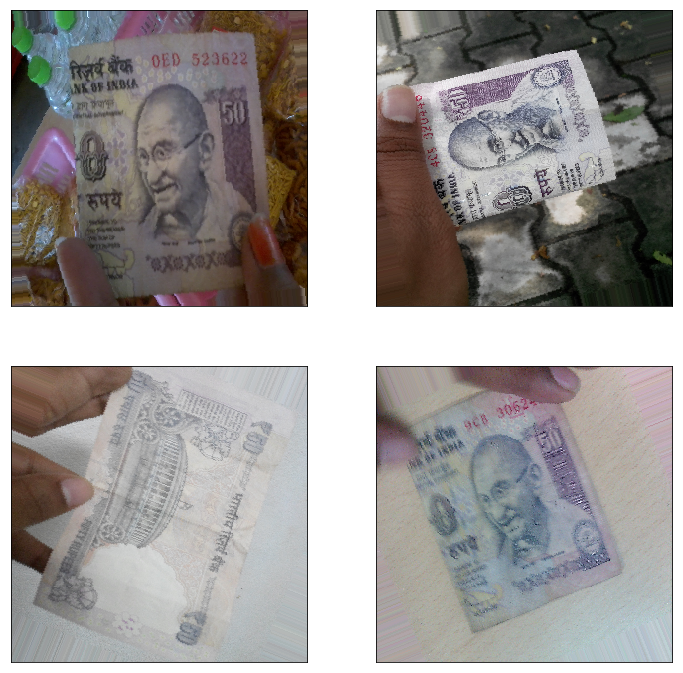

In [157]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')

datagen_rr = ImageDataGenerator(rotation_range=30)
datagen_rr.fit(X_train)

for X_batch, Y_batch in datagen_rr.flow(X_train, Y_train, batch_size=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

## Random Shifts

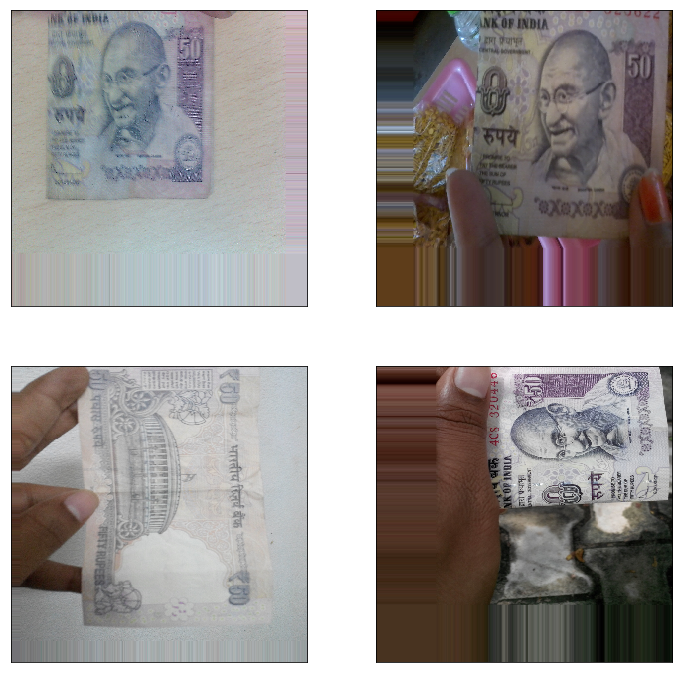

In [156]:
shift=0.2
datagen_rs = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen_rs.fit(X_train)

for X_batch, Y_batch in datagen_rs.flow(X_train, Y_train, batch_size=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

## Random Flips

- Random flip is not required as test set won't be in flipped version.

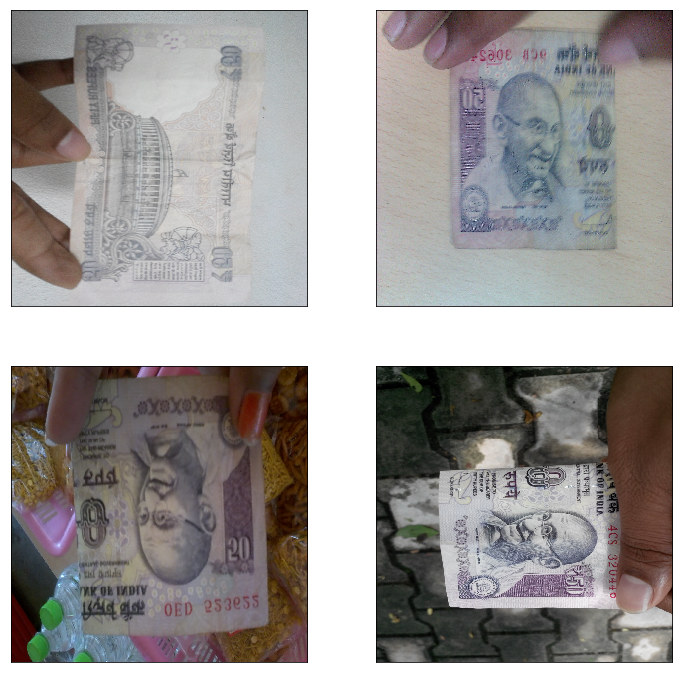

In [154]:
datagen_rf = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen_rf.fit(X_train)

for X_batch, Y_batch in datagen_rf.flow(X_train, Y_train, batch_size=9):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

## Random Shear

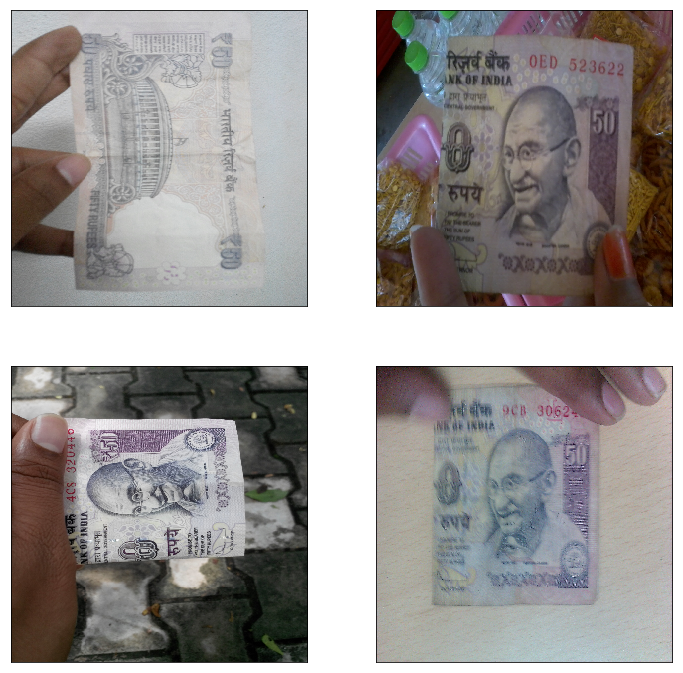

In [164]:
datagen_rsh = ImageDataGenerator(shear_range=0.2)
datagen_rsh.fit(X_train)

for X_batch, Y_batch in datagen_rsh.flow(X_train, Y_train, batch_size=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

## Random Zooming

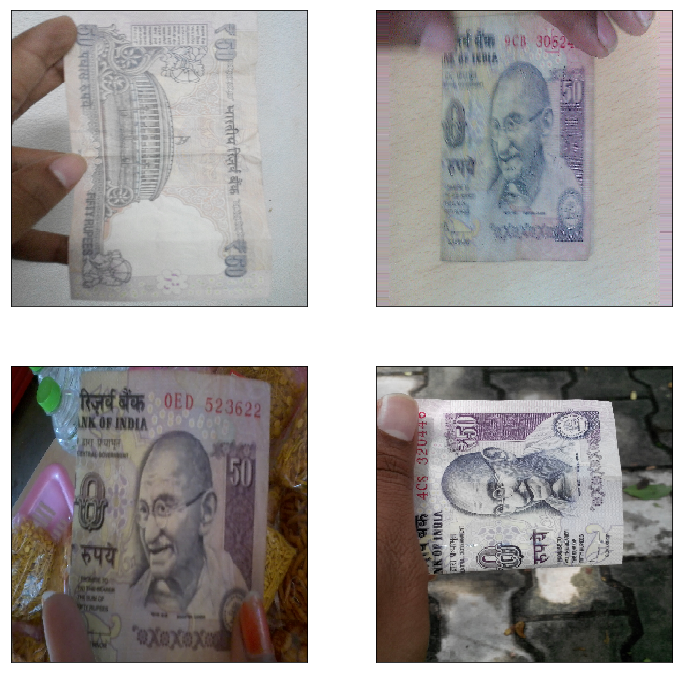

In [166]:
datagen_rz = ImageDataGenerator(zoom_range=0.2)
datagen_rz.fit(X_train)

for X_batch, Y_batch in datagen_rz.flow(X_train, Y_train, batch_size=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for i,ax in enumerate(axes.flat):
        ax.imshow(X_batch[i].astype('uint8')) # float32 showing negative image
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break